In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
df = pd.read_csv("/kaggle/input/weather-data-csv/weather_data.csv")
df.head()

In [153]:
df.shape

(311, 7)

In [154]:
df.dtypes

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object

In [3]:
df['date'] = pd.to_datetime(df['date'])

# Feature Creation

In [4]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df['day_of_week'] = df['date'].dt.weekday 
df['week_of_year'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

In [157]:
df

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,year,month,day,day_of_week,week_of_year,quarter
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681,2023,1,1,6,52,1
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025,2023,1,2,0,1,1
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357,2023,1,3,1,1,1
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142,2023,1,4,2,1,1
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331,2023,1,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875,2023,11,3,4,44,4
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410,2023,11,4,5,44,4
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431,2023,11,5,6,44,4
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269,2023,11,6,0,45,4


# Data Preprocessing

In [93]:
duplicates = df[df.duplicated()]
duplicates

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,year,month,day,day_of_week,week_of_year,quarter


## Handling missing values

In [94]:
# Check missing values count
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0])

                 Missing Values  Percentage
avg_temperature              15    4.823151
humidity                     15    4.823151
avg_wind_speed               15    4.823151
cloud_cover                  15    4.823151


In [95]:
missing_records = df[df.isna().any(axis=1)]
print(missing_records)

          date  avg_temperature  humidity  avg_wind_speed rain_or_not  \
12  2023-01-13              NaN       NaN             NaN     No Rain   
15  2023-01-16              NaN       NaN             NaN        Rain   
16  2023-01-17              NaN       NaN             NaN     No Rain   
44  2023-02-14              NaN       NaN             NaN        Rain   
47  2023-02-17              NaN       NaN             NaN        Rain   
52  2023-02-22              NaN       NaN             NaN     No Rain   
57  2023-02-27              NaN       NaN             NaN        Rain   
71  2023-03-13              NaN       NaN             NaN     No Rain   
111 2023-04-22              NaN       NaN             NaN        Rain   
114 2023-04-25              NaN       NaN             NaN        Rain   
125 2023-05-06              NaN       NaN             NaN        Rain   
140 2023-05-21              NaN       NaN             NaN        Rain   
216 2023-08-05              NaN       NaN          

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [96]:
# def find_closest_values(row, df):
#     # Get the index of the missing row
#     idx = df_sorted.index.get_loc(row.name)
    
#     # Find the previous non-null row (before the current row)
#     prev_row = df_sorted.iloc[idx - 1] if idx > 0 else None
    
#     # Find the next non-null row (after the current row)
#     next_row = df_sorted.iloc[idx + 1] if idx < len(df_sorted) - 1 else None
    
#     return prev_row, next_row

In [97]:
# for index, row in missing_records.iterrows():
#     prev_row, next_row = find_closest_values(row, df)
    
#     print(f"\nMissing data at index {index} ({row['date']}):")
#     if prev_row is not None:
#         print("Previous closest row:\n", prev_row)
#     if next_row is not None:
#         print("Next closest row:\n", next_row)

In [6]:
df = df.dropna()  # Almost all the features missing are in the same records

In [99]:
# df = df.fillna(method='ffill')

In [195]:
df.isnull().sum()

date               0
avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
year               0
month              0
day                0
day_of_week        0
week_of_year       0
quarter            0
dtype: int64

## EDA

In [101]:
df.describe()

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,year,month,day,day_of_week,week_of_year,quarter
count,296,296.000000,296.000000,296.000000,296.000000,296.000000,296.0,296.000000,296.000000,296.000000,296.0,296.000000
mean,2023-06-07 10:42:09.729729792,25.983840,55.041385,7.556636,49.834827,1000.954364,2023.0,5.733108,15.371622,3.013514,23.094595,2.273649
min,2023-01-01 00:00:00,15.000000,30.000000,0.069480,0.321826,951.240404,2023.0,1.000000,1.000000,0.000000,1.0,1.000000
25%,2023-03-23 18:00:00,20.265692,34.280826,3.550354,24.530951,975.599544,2023.0,3.000000,7.750000,1.000000,12.0,1.000000
50%,2023-06-09 12:00:00,27.177958,56.759806,7.326421,50.725120,1001.243321,2023.0,6.000000,15.000000,3.000000,23.0,2.000000
75%,2023-08-23 06:00:00,32.204599,72.189837,11.050627,76.046506,1027.247927,2023.0,8.000000,23.000000,5.000000,34.0,3.000000
max,2023-11-07 00:00:00,35.000000,90.000000,56.636041,99.834751,1049.543752,2023.0,11.000000,31.000000,6.000000,52.0,4.000000
std,NaN,6.802475,19.220133,5.344683,29.009459,29.053359,0.0,2.930792,8.950546,1.998259,12.797954,0.999719


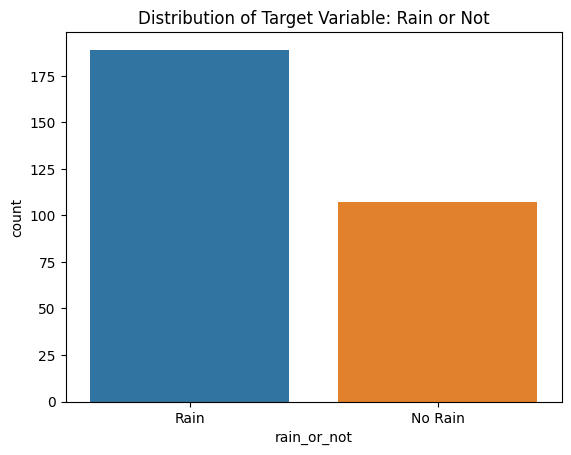

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the distribution of the target variable
sns.countplot(x='rain_or_not', data=df)
plt.title("Distribution of Target Variable: Rain or Not")
plt.show()

<ipython-input-103-41ac4b7df965>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain_or_not_numeric'] = df['rain_or_not'].map({'No Rain': 0, 'Rain': 1})


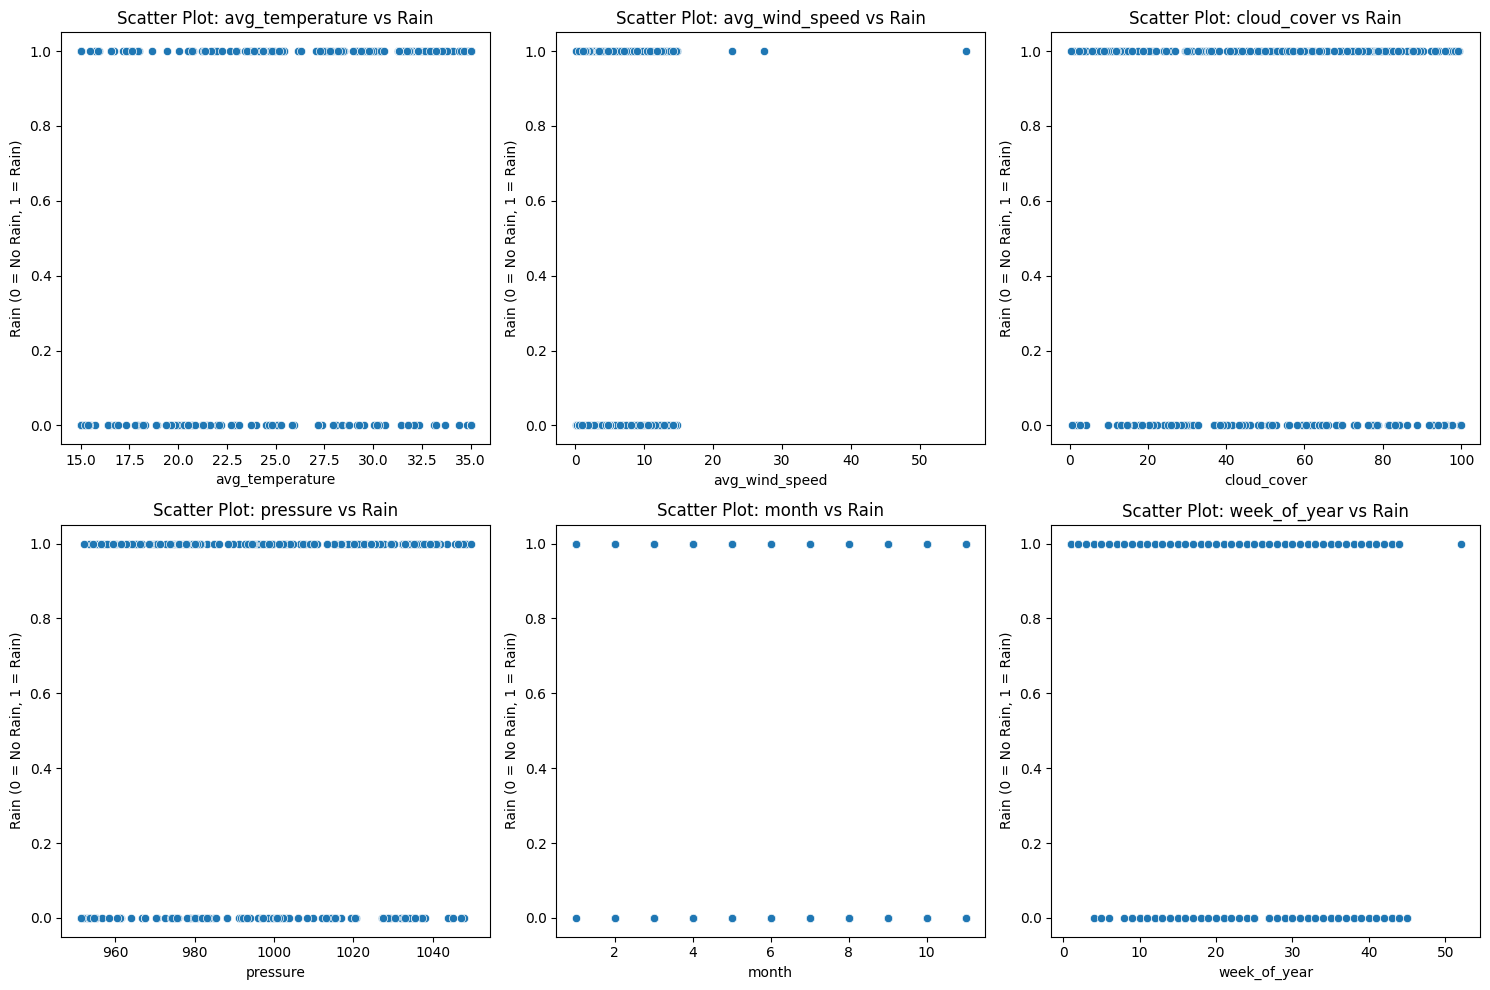

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical target variable into numerical format
df.loc[:, 'rain_or_not_numeric'] = df['rain_or_not'].map({'No Rain': 0, 'Rain': 1})

# Selecting all numerical features except 'rain_or_not_numeric'
numerical_features = ['avg_temperature', 'avg_wind_speed', 'cloud_cover', 'pressure', 'month', 'week_of_year']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust subplot layout

# Loop through features and create scatter plots
for ax, feature in zip(axes.flat, numerical_features):
    sns.scatterplot(x=df[feature], y=df['rain_or_not_numeric'], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Rain (0 = No Rain, 1 = Rain)')
    ax.set_title(f'Scatter Plot: {feature} vs Rain')

plt.tight_layout()
plt.show()


Conclusion from the scatter plots:
* Cloud cover and pressure seem to have the strongest association with rainfall.
* Temperature shows some trend. Lower values have a higher probability of rain.
* Wind speed, month, and week of year may have some influence. But the relationship isn't clear from the scatter plots alone.

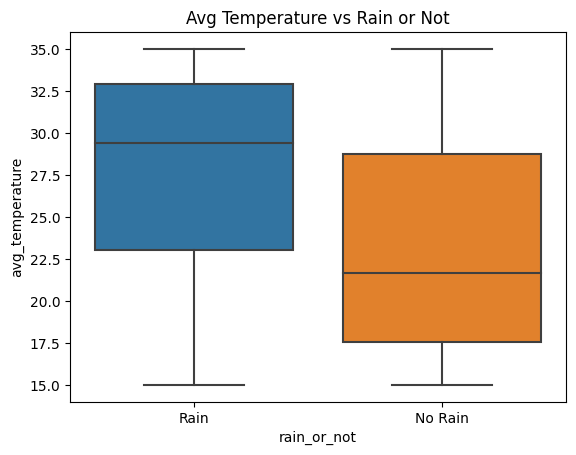

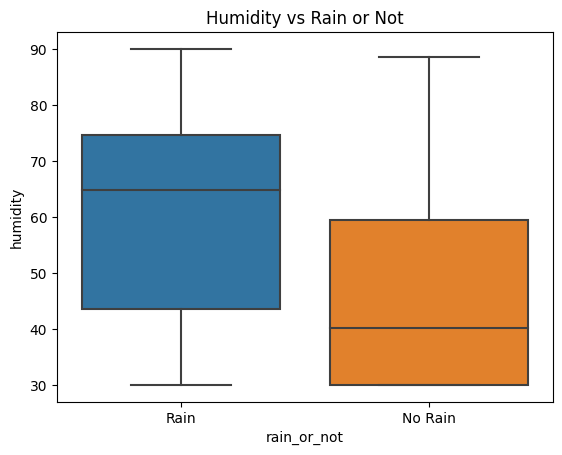

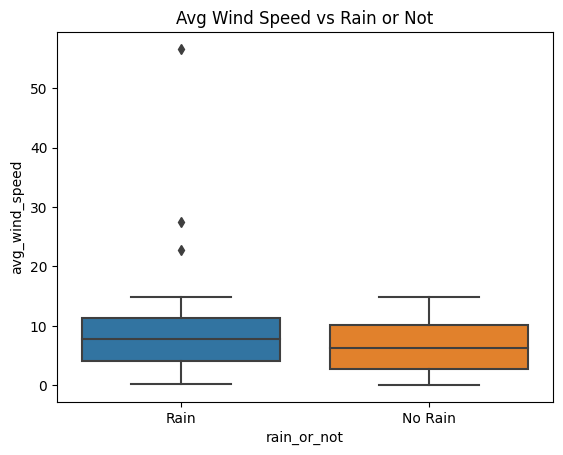

In [104]:
# Boxplot for avg_temperature vs rain_or_not
sns.boxplot(x='rain_or_not', y='avg_temperature', data=df)
plt.title("Avg Temperature vs Rain or Not")
plt.show()

# Boxplot for humidity vs rain_or_not
sns.boxplot(x='rain_or_not', y='humidity', data=df)
plt.title("Humidity vs Rain or Not")
plt.show()

# Boxplot for avg_wind_speed vs rain_or_not
sns.boxplot(x='rain_or_not', y='avg_wind_speed', data=df)
plt.title("Avg Wind Speed vs Rain or Not")
plt.show()

It seems like Avg Wind Speed is not a differentiating factor between rain and no rain. But the outliers might suggest very high winds can predict rain.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

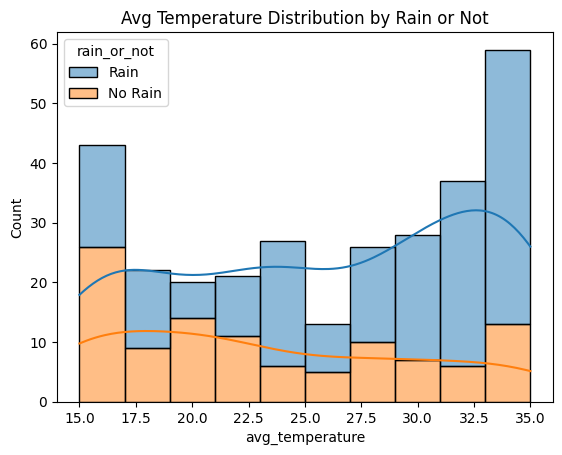

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

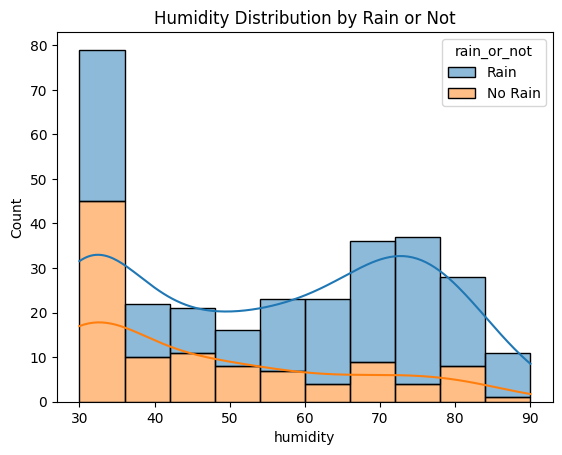

In [105]:
# Histogram for avg_temperature
sns.histplot(df, x='avg_temperature', hue='rain_or_not', multiple='stack', kde=True)
plt.title("Avg Temperature Distribution by Rain or Not")
plt.show()

# Histogram for humidity
sns.histplot(df, x='humidity', hue='rain_or_not', multiple='stack', kde=True)
plt.title("Humidity Distribution by Rain or Not")
plt.show()

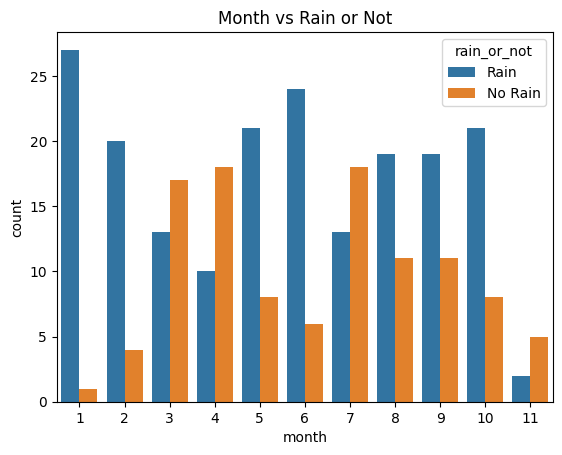

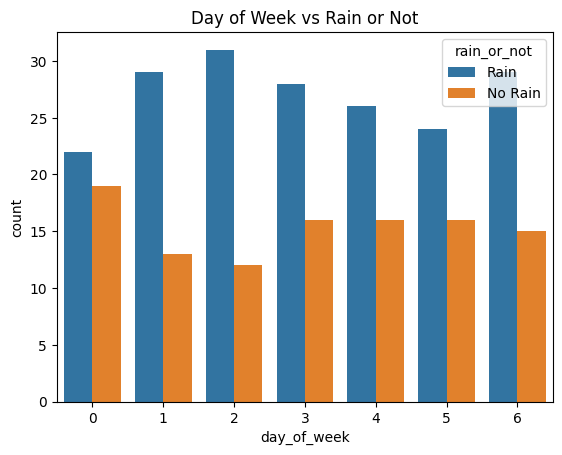

In [113]:
# Count plot for month vs rain_or_not
sns.countplot(x='month', hue='rain_or_not', data=df)
plt.title("Month vs Rain or Not")
plt.show()

# Count plot for day_of_week vs rain_or_not
sns.countplot(x='day_of_week', hue='rain_or_not', data=df)
plt.title("Day of Week vs Rain or Not")
plt.show()

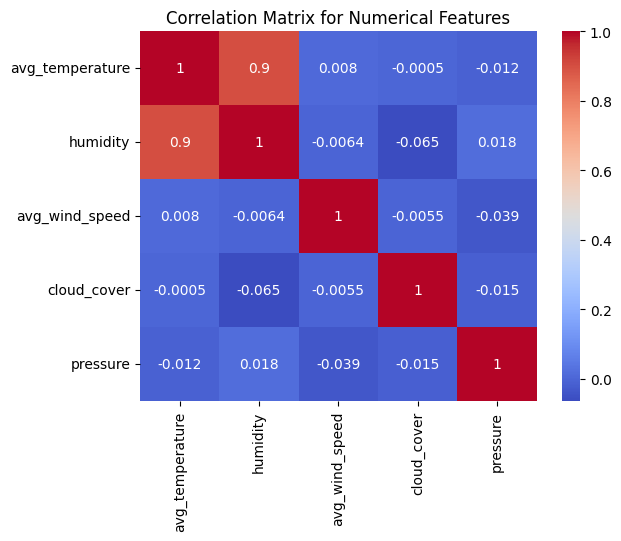

In [114]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numerical features
corr = numeric_df.corr()

# Plot correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

* Average temperature and humidity are correlated with each other.
* Therefore it will be better if one of the features is dropped

In [159]:
import pandas as pd
from scipy import stats

categorical_columns = ['rain_or_not', 'month', 'day_of_week', 'week_of_year', 'day', 'quarter']

# Chi-Square test
for column in categorical_columns[1:]:  
    contingency_table = pd.crosstab(df['rain_or_not'], df[column])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Chi-Square Test for {column}:")
    print(f"p-value: {p_value}")

    # If p-value < 0.05, reject the null hypothesis (there is an association)
    if p_value < 0.05:
        print(f"Result: Significant relationship between {column} and rain_or_not.")
    else:
        print(f"Result: No significant relationship between {column} and rain_or_not.")
    print("="*50)

Chi-Square Test for month:
p-value: 8.116784802884258e-07
Result: Significant relationship between month and rain_or_not.
Chi-Square Test for day_of_week:
p-value: 0.6753448552554551
Result: No significant relationship between day_of_week and rain_or_not.
Chi-Square Test for week_of_year:
p-value: 0.001127762030863648
Result: Significant relationship between week_of_year and rain_or_not.
Chi-Square Test for day:
p-value: 0.5767394564073309
Result: No significant relationship between day and rain_or_not.
Chi-Square Test for quarter:
p-value: 0.13840949114252274
Result: No significant relationship between quarter and rain_or_not.


# Feature Engineering and Feature Selection

In [7]:
df['year'].unique() # To check if we can drop year column

array([2023], dtype=int32)

In [10]:
df = df.drop(['year', 'day', 'day_of_week', 'quarter', 'month'], axis=1)

In [11]:
df = df.drop(['date'], axis=1)

In [ ]:
# # Create a new feature as the product of humidity and avg_temperature
# df['temperature_humidity_interaction'] = df['avg_temperature'] * df['humidity']

In [ ]:
# df['rain_or_not_encoded'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

# # Calculate the correlation between the new feature and the target variable
# correlation = df['temperature_humidity_interaction'].corr(df['rain_or_not_encoded'])

# print(f"Correlation between the new feature and rain_or_not: {correlation}")

In [ ]:
# # Dropping unwanted columns
# df = df.drop(['avg_temperature', 'rain_or_not_encoded'], axis=1)

# df.head()

In [16]:
df = df.drop(['humidity'], axis=1)   # Humidity and Temperature are correlated

In [ ]:
# df = df.drop(['avg_wind_speed'], axis=1)  

# Binning

In [120]:
df.describe()

,avg_temperature,avg_wind_speed,cloud_cover,pressure,month,week_of_year
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.0
mean,25.983840,7.556636,49.834827,1000.954364,5.733108,23.094595
std,6.802475,5.344683,29.009459,29.053359,2.930792,12.797954
min,15.000000,0.069480,0.321826,951.240404,1.000000,1.0
25%,20.265692,3.550354,24.530951,975.599544,3.000000,12.0
50%,27.177958,7.326421,50.725120,1001.243321,6.000000,23.0
75%,32.204599,11.050627,76.046506,1027.247927,8.000000,34.0
max,35.000000,56.636041,99.834751,1049.543752,11.000000,52.0


Cloud cover is already in a range where it can be interpreted directly.

In [ ]:
# Binning decreases the accuracy. Therefore commented out

# df['avg_temperature_bins'] = pd.cut(df['avg_temperature'], bins=5, labels=False)
# df['avg_wind_speed_bins'] = pd.qcut(df['avg_wind_speed'], q=4, labels=False)  

# Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['week_of_year'] = scaler.fit_transform(df[['week_of_year']])

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[['avg_wind_speed', 'cloud_cover', 'pressure']] = scaler.fit_transform(df[['avg_wind_speed', 'cloud_cover', 'pressure']])

# df.head()

In [ ]:
# # Scaling 'temperature_humidity_interaction' feature
# df['temperature_humidity_interaction'] = scaler.fit_transform(df[['temperature_humidity_interaction']])

# df.head()

# Encoding

In [165]:
df.describe()

,avg_temperature,avg_wind_speed,cloud_cover,pressure,week_of_year
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,25.983840,7.556636,49.834827,1000.954364,0.433227
std,6.802475,5.344683,29.009459,29.053359,0.250940
min,15.000000,0.069480,0.321826,951.240404,0.000000
25%,20.265692,3.550354,24.530951,975.599544,0.215686
50%,27.177958,7.326421,50.725120,1001.243321,0.431373
75%,32.204599,11.050627,76.046506,1027.247927,0.647059
max,35.000000,56.636041,99.834751,1049.543752,1.000000


Wind speed and pressure have extreme values

In [13]:
df['avg_wind_speed'] = np.log1p(df['avg_wind_speed'])  

In [14]:
df['pressure'] = np.log1p(df['pressure'])

In [168]:
df.describe()

,avg_temperature,avg_wind_speed,cloud_cover,pressure,week_of_year
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,25.983840,1.943749,49.834827,6.909288,0.433227
std,6.802475,0.691569,29.009459,0.029038,0.250940
min,15.000000,0.067173,0.321826,6.858818,0.000000
25%,20.265692,1.515168,24.530951,6.884077,0.215686
50%,27.177958,2.119432,50.725120,6.909996,0.431373
75%,32.204599,2.489117,76.046506,6.935612,0.647059
max,35.000000,4.054148,99.834751,6.957063,1.000000


In [ ]:
# Sin-Cos encoding decreased the accuracy of every model

# # Capture cyclical nature of 'week_of_year' and 'month'
# df['week_of_year_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 52)
# df['week_of_year_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 52)

# df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# df.drop(['month'], axis=1, inplace=True) 
# df = df.drop('week_of_year', axis=1)

# df.head()

# Model Testing

## Logistic Regression

In [ ]:
# Without date
df = df.drop(['date'], axis=1)

from sklearn.model_selection import train_test_split

X = df.drop('rain_or_not', axis=1) 
y = df['rain_or_not'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Evaluation: Without date')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('rain_or_not', axis=1) 
y = df['rain_or_not'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Evaluation: Month and day extracted')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('rain_or_not', axis=1) 
y = df['rain_or_not'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Evaluation: Without humidity')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('rain_or_not', axis=1) 
y = df['rain_or_not'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Evaluation: With week of year')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('rain_or_not', axis=1) 
y = df['rain_or_not'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Evaluation: Sin-cos encoding for the month and week')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('rain_or_not', axis=1) 
y = df['rain_or_not'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Evaluation: After standardizing')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('rain_or_not', axis=1) 
y = df['rain_or_not'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Evaluation: Without wind speed')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Evaluation: Without date')
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Evaluation: Month and day extracted')
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Evaluation: Without humidity')
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Evaluation: With week of year and humidity')
print("Random Forest Classification Report: Note: Removing humidity decreased the accuracy")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Evaluation: Sin-cos encoding for the month and week. Note: without humidity')
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Evaluation: After standardizing')
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Evaluation: Without wind speed')
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

## XGB

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42) 
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print('Evaluation: Without date')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42) 
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print('Evaluation: Month and day extracted')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42) 
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print('Evaluation: Without humidity')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42) 
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print('Evaluation: With week of year')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42) 
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print('Evaluation: sin-cos encoding for the month and week')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42) 
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print('Evaluation: After standardizing')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42) 
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print('Evaluation: without wind speed')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svm_model = SVC(class_weight='balanced', random_state=42)  # class_weight='balanced' to address class imbalance
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('Evaluation: Without date')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svm_model = SVC(class_weight='balanced', random_state=42)  # class_weight='balanced' to address class imbalance
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('Evaluation: Month and day extracted')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svm_model = SVC(class_weight='balanced', random_state=42)  # class_weight='balanced' to address class imbalance
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('Evaluation: Without humidity')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svm_model = SVC(class_weight='balanced', random_state=42)  # class_weight='balanced' to address class imbalance
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('Evaluation: With week of year')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svm_model = SVC(class_weight='balanced', random_state=42)  # class_weight='balanced' to address class imbalance
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('Evaluation: With sin-cos encoding for the month and week')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svm_model = SVC(class_weight='balanced', random_state=42)  # class_weight='balanced' to address class imbalance
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('Evaluation: After standardizing')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svm_model = SVC(class_weight='balanced', random_state=42)  # class_weight='balanced' to address class imbalance
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('Evaluation: Without wind speed, wihtout standardizing')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

## Gradeint Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: Without date')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: Month and day extracted')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: Without humidity')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: With week of year')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: sin-cos encoding for the week and month')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: After standardizing')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: Without wind speed')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

### Hyperparameter tuning - Gradient Boosting

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

# X = df.drop('rain_or_not', axis=1)
# y = df['rain_or_not']

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)  

# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# gb_model = GradientBoostingClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 150, 200],  # Number of trees
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],  
#     'max_depth': [3, 5, 7, 10],  
#     'min_samples_split': [2, 5, 10],  
#     'min_samples_leaf': [1, 2, 5],  # Minimum samples required to be at a leaf node
#     'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples to fit the trees
# }

# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# grid_search.fit(X_train, y_train)

# print("Best Parameters Found: ", grid_search.best_params_)

# best_model = grid_search.best_estimator_

# y_pred_gb = best_model.predict(X_test)

# y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

# print("Gradient Boosting Classification Report (Tuned):")
# print(classification_report(y_test, y_pred_gb))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_gb))

## LGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print('Evaluation: Without date')
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print('Evaluation: Month and day extracted')
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print('Evaluation: Without humidity')
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print('Evaluation: With week of year')
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print('Evaluation: sin-cos encoding for the week and month')
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print('Evaluation: After Standardizing')
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print('Evaluation: Withut windspeed')
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

# Final Model

Note
* Gradient Boosting and LGBM will be used here
* No standardization
* No humidity (Try to re-engineer)
* Week of the year should be added
* Wind speed should be added
* Relating humidity with temperature decreased the accuracy
* Binning reduced accuracy

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print('Evaluation: ')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Evaluation: 
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.71      1.00      0.83        12

    accuracy                           0.76        21
   macro avg       0.85      0.72      0.72        21
weighted avg       0.83      0.76      0.74        21

Confusion Matrix:
[[ 4  5]
 [ 0 12]]


In [172]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder

# X = df.drop('rain_or_not', axis=1)
# y = df['rain_or_not']

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)  

# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, shuffle=True)

# lgb_model = lgb.LGBMClassifier(random_state=42)
# lgb_model.fit(X_train, y_train)

# y_pred_lgb = lgb_model.predict(X_test)

# y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

# print('Evaluation: ')
# print("LightGBM Classification Report:")
# print(classification_report(y_test, y_pred_lgb))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_lgb))

Evaluation: 
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        28
           1       0.77      0.75      0.76        61

    accuracy                           0.67        89
   macro avg       0.62      0.63      0.63        89
weighted avg       0.68      0.67      0.68        89

Confusion Matrix:
[[14 14]
 [15 46]]


In [128]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder

# X = df.drop('rain_or_not', axis=1)
# y = df['rain_or_not']

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)  

# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=True)

# lgb_model = lgb.LGBMClassifier(random_state=42)
# lgb_model.fit(X_train, y_train)

# y_pred_lgb = lgb_model.predict(X_test)

# y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

# print('Evaluation: ')
# print("LightGBM Classification Report:")
# print(classification_report(y_test, y_pred_lgb))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_lgb))

Evaluation: 
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.50      0.46        18
           1       0.77      0.71      0.74        42

    accuracy                           0.65        60
   macro avg       0.60      0.61      0.60        60
weighted avg       0.67      0.65      0.66        60

Confusion Matrix:
[[ 9  9]
 [12 30]]


In [175]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:] 

lgb_model = lgb.LGBMClassifier(random_state=42)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)
y_test_decoded = label_encoder.inverse_transform(y_test)

print('Evaluation: ')
print("LGBM Classification Report:")
print(classification_report(y_test_decoded, y_pred_lgb_decoded))
print("Confusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_lgb_decoded))


Evaluation: 
LGBM Classification Report:
              precision    recall  f1-score   support

     No Rain       0.50      0.33      0.40         9
        Rain       0.60      0.75      0.67        12

    accuracy                           0.57        21
   macro avg       0.55      0.54      0.53        21
weighted avg       0.56      0.57      0.55        21

Confusion Matrix:
[[3 6]
 [3 9]]


In [174]:
df['rain_or_not'].value_counts()

rain_or_not
Rain       189
No Rain    107
Name: count, dtype: int64

# Cross Validation

In [176]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

lgb_model = lgb.LGBMClassifier()

scores = cross_val_score(lgb_model, X, y, cv=5)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.66666667 0.52542373 0.62711864 0.42372881 0.62711864]


In [177]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

lgb_model = lgb.LGBMClassifier()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lgb_model, X, y, cv=stratified_kfold)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.61666667 0.54237288 0.52542373 0.6440678  0.71186441]


In [178]:
print("Average cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())

Average cross-validation score: 0.6080790960451977
Standard deviation of cross-validation scores: 0.06824886818515287


In [205]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]

gb_model = GradientBoostingClassifier(random_state=42)

cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')  

print("Cross-Validation Scores (5-fold):", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy:", np.std(cv_scores))

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)
y_test_decoded = label_encoder.inverse_transform(y_test)

print('Evaluation: ')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Cross-Validation Scores (5-fold): [0.65454545 0.49090909 0.6        0.45454545 0.65454545]
Mean Cross-Validation Accuracy: 0.5709090909090909
Standard Deviation of Cross-Validation Accuracy: 0.08339887229948884
Evaluation: 
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.71      1.00      0.83        12

    accuracy                           0.76        21
   macro avg       0.85      0.72      0.72        21
weighted avg       0.83      0.76      0.74        21

Confusion Matrix:
[[ 4  5]
 [ 0 12]]


# Hyper-parameter tuning

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import randint, uniform

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]

gb_model = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(50, 200),  # Number of boosting stages 
    'learning_rate': uniform(0.01, 0.5), 
    'max_depth': randint(3, 10),  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20), 
    'subsample': uniform(0.7, 0.3),  
    'max_features': ['auto', 'sqrt', 'log2', None] 
}

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,  
    random_state=42,
    n_jobs=-1,
    verbose=2 
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters found by RandomizedSearchCV:")
print(best_params)

best_gb_model = random_search.best_estimator_

y_pred_gb = best_gb_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)
y_test_decoded = label_encoder.inverse_transform(y_test)

print('Evaluation: ')
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters found by RandomizedSearchCV:
{'learning_rate': 0.31582658024414045, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 17, 'min_samples_split': 11, 'n_estimators': 64, 'subsample': 0.8368209952651107}
Evaluation: 
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.62      0.67      0.64        12

    accuracy                           0.57        21
   macro avg       0.56      0.56      0.56        21
weighted avg       0.57      0.57      0.57        21

Confusion Matrix:
[[4 5]
 [4 8]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

print("Best cross-validation score:", grid_search.best_score_)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred_gb = best_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]
y_train = y_encoded[:-21]

X_test = X.iloc[-21:]
y_test = y_encoded[-21:]

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_gb = best_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)
y_test_decoded = label_encoder.inverse_transform(y_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation score: 0.6072727272727272
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.69      0.92      0.79        12

    accuracy                           0.71        21
   macro avg       0.74      0.68      0.68        21
weighted avg       0.74      0.71      0.69        21

Confusion Matrix:
[[ 4  5]
 [ 1 11]]


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_model = GradientBoostingClassifier(random_state=42)

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]
y_train = y_encoded[:-21]

X_test = X.iloc[-21:]
y_test = y_encoded[-21:]

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['auto', 'sqrt']
}

best_model = None
best_score = 0
best_params = None

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
    
if grid_search.best_score_ > best_score:
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Best Model: GradientBoostingClassifier(max_features='sqrt', n_estimators=50,
                           random_state=42, subsample=0.8)
Best Cross-Validation Accuracy: 0.6072727272727272
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Test Accuracy: 0.7142857142857143


In [133]:
# import lightgbm as lgb
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# lgb_model = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=-1)

# param_dist = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'num_leaves': [31, 50, 100, 200],
#     'max_depth': [6, 10, 15, -1],  
#     'min_data_in_leaf': [20, 50, 100],  # More data per leaf to avoid overfitting
#     'feature_fraction': [0.8, 0.9, 1.0],
#     'bagging_fraction': [0.8, 0.9, 1.0],
#     'bagging_freq': [5, 10],
#     'lambda_l1': [0, 0.1, 0.5, 1.0],
#     'lambda_l2': [0, 0.1, 0.5, 1.0]
# }

# random_search = RandomizedSearchCV(
#     estimator=lgb_model,
#     param_distributions=param_dist,
#     n_iter=10, 
#     cv=5,  
#     verbose=0,  
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_

# print("Best hyperparameters found by RandomizedSearch:")
# print(best_params)

# best_model = random_search.best_estimator_

# best_model.fit(X_train, y_train,
#                eval_set=[(X_train, y_train), (X_test, y_test)],
#                eval_names=['train', 'valid'])

# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)

# print(f"Test accuracy of the best model: {test_accuracy:.4f}")

Best hyperparameters found by RandomizedSearch:
{'num_leaves': 100, 'min_data_in_leaf': 50, 'max_depth': -1, 'learning_rate': 0.1, 'lambda_l2': 0.1, 'lambda_l1': 0, 'feature_fraction': 0.8, 'bagging_freq': 5, 'bagging_fraction': 1.0}
Test accuracy of the best model: 0.6500


In [179]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21] 
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]  

lgb_model = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=-1)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 100, 200],
    'max_depth': [6, 10, 15, -1],
    'min_data_in_leaf': [20, 50, 100],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'bagging_freq': [5, 10],
    'lambda_l1': [0, 0.1, 0.5, 1.0],
    'lambda_l2': [0, 0.1, 0.5, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

print("Best hyperparameters found by RandomizedSearch:")
print(best_params)

best_model = random_search.best_estimator_

best_model.fit(X_train, y_train,
               eval_set=[(X_train, y_train), (X_test, y_test)],
               eval_names=['train', 'valid'])

y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy of the best model: {test_accuracy:.4f}")


Best hyperparameters found by RandomizedSearch:
{'num_leaves': 31, 'min_data_in_leaf': 100, 'max_depth': -1, 'learning_rate': 0.05, 'lambda_l2': 0, 'lambda_l1': 0.1, 'feature_fraction': 0.8, 'bagging_freq': 5, 'bagging_fraction': 0.8}
Test accuracy of the best model: 0.7143


In [180]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=True)

best_params = {
    'num_leaves': 31,
    'min_data_in_leaf': 100,
    'max_depth': -1,
    'learning_rate': 0.05,
    'lambda_l2': 0,
    'lambda_l1': 0.1,
    'feature_fraction': 0.8,
    'bagging_freq': 5,
    'bagging_fraction': 0.8,
    'random_state': 42
}

lgb_model = lgb.LGBMClassifier(**best_params)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.70      1.00      0.82        42

    accuracy                           0.70        60
   macro avg       0.35      0.50      0.41        60
weighted avg       0.49      0.70      0.58        60

Confusion Matrix:
[[ 0 18]
 [ 0 42]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]

lgb_model = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=-1)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [6, 10, 15],
    'min_data_in_leaf': [20, 50, 100]
}

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=10,  
    cv=5, 
    verbose=0,  
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters found by RandomizedSearchCV:")
print(best_params)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy of the best model: {test_accuracy:.4f}")

Best hyperparameters found by RandomizedSearchCV:
{'num_leaves': 50, 'min_data_in_leaf': 50, 'max_depth': 15, 'learning_rate': 0.01}
Test accuracy of the best model: 0.5714


In [182]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]

best_params = {
    'num_leaves': 50,
    'min_data_in_leaf': 50,
    'max_depth': 15,
    'learning_rate': 0.01,
    'random_state': 42
}

lgb_model = lgb.LGBMClassifier(**best_params)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.57      1.00      0.73        12

    accuracy                           0.57        21
   macro avg       0.29      0.50      0.36        21
weighted avg       0.33      0.57      0.42        21

Confusion Matrix:
[[ 0  9]
 [ 0 12]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('rain_or_not', axis=1)  
y = df['rain_or_not']  

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'num_leaves': [31, 50, 100],       
    'max_depth': [-1, 10, 20],           
    'learning_rate': [0.01, 0.1, 0.3],   
    'n_estimators': [100, 200, 500]     
}

grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid, cv=stratified_kfold)

grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

X_train = X.iloc[:-21]  
y_train = y_encoded[:-21] 

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:]

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters found: {'learning_rate': 0.3, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validation score: 0.6247457627118644
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.67      0.67      0.67        12

    accuracy                           0.62        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.62      0.62      0.62        21

Confusion Matrix:
[[5 4]
 [4 8]]


# Predicting

How accuracy varied for LGBM: 
* Without any parameter: 0.57
* Randomized Search got a model with 0.71 accuracy, but the precision, recall, and f1-score was 0
* Another randomized search with less parameters got a 0.57 accuracy 
* Grid search got the best parameter set as it had a reasonable accuracy, precision, recall, and f1 score

How accuracy varied for Gradient Boosting: 
* Without any parameter: 0.76 (The precision, recall, f1-score were also better)
* Randomized Search: 0.57
* Grid search : 0.71 (Other scores were also reasonable)

The low accuracy is due to the small data set.

In [188]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21] 
y_train = y_encoded[:-21]  

X_test = X.iloc[-21:]  
y_test = y_encoded[-21:] 

best_params = {
    'learning_rate': 0.3,
    'max_depth': -1,
    'n_estimators': 100,
    'num_leaves': 31,
    'random_state': 42
}

# Initialize the LGBM model with the best parameters
lgb_model = lgb.LGBMClassifier(**best_params)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

y_pred_lgb_decoded = label_encoder.inverse_transform(y_pred_lgb)

y_test_decoded = label_encoder.inverse_transform(y_test)

original_df = pd.read_csv('/kaggle/input/weather-data-csv/weather_data.csv')
dates_test = original_df['date'].iloc[-21:]

comparison_df = pd.DataFrame({
    'Date': dates_test,
    'Predicted': y_pred_lgb_decoded,
    'Actual': y_test_decoded
})

print("Predicted vs Actual values:")
print(comparison_df)


# Classification Report
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))


Predicted vs Actual values:
           Date Predicted   Actual
290  2023-10-18      Rain     Rain
291  2023-10-19      Rain     Rain
292  2023-10-20      Rain     Rain
293  2023-10-21      Rain     Rain
294  2023-10-22      Rain  No Rain
295  2023-10-23      Rain     Rain
296  2023-10-24   No Rain     Rain
297  2023-10-25      Rain     Rain
298  2023-10-26   No Rain  No Rain
299  2023-10-27   No Rain     Rain
300  2023-10-28      Rain     Rain
301  2023-10-29      Rain  No Rain
302  2023-10-30   No Rain     Rain
303  2023-10-31      Rain  No Rain
304  2023-11-01   No Rain     Rain
305  2023-11-02   No Rain  No Rain
306  2023-11-03   No Rain  No Rain
307  2023-11-04      Rain  No Rain
308  2023-11-05      Rain     Rain
309  2023-11-06   No Rain  No Rain
310  2023-11-07   No Rain  No Rain

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.67      0.67      0.67        12

    a

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop('rain_or_not', axis=1)
y = df['rain_or_not']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X.iloc[:-21]
y_train = y_encoded[:-21]

X_test = X.iloc[-21:]
y_test = y_encoded[-21:]

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred_gb = best_model.predict(X_test)

y_pred_gb_decoded = label_encoder.inverse_transform(y_pred_gb)

y_test_decoded = label_encoder.inverse_transform(y_test)

original_df = pd.read_csv('/kaggle/input/weather-data-csv/weather_data.csv')
dates_test = original_df['date'].iloc[-21:]

comparison_df = pd.DataFrame({
    'Date': dates_test,
    'Predicted': y_pred_gb_decoded,
    'Actual': y_test_decoded
})

print("Predicted vs Actual values:")
print(comparison_df)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Predicted vs Actual values:
           Date Predicted   Actual
290  2023-10-18      Rain     Rain
291  2023-10-19      Rain     Rain
292  2023-10-20      Rain     Rain
293  2023-10-21      Rain     Rain
294  2023-10-22      Rain  No Rain
295  2023-10-23      Rain     Rain
296  2023-10-24      Rain     Rain
297  2023-10-25      Rain     Rain
298  2023-10-26      Rain  No Rain
299  2023-10-27      Rain     Rain
300  2023-10-28      Rain     Rain
301  2023-10-29   No Rain  No Rain
302  2023-10-30   No Rain     Rain
303  2023-10-31      Rain  No Rain
304  2023-11-01      Rain     Rain
305  2023-11-02   No Rain  No Rain
306  2023-11-03   No Rain  No Rain
307  2023-11-04      Rain  No Rain
308  2023-11-05      Rain     Rain
309  2023-11-06      Rain  No Rain
310  2023-11-07   No Rain  No Rain
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.69      0.92      0.79        1